<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header">
      <a class="navbar-brand" href="0_Dataoving3.ipynb">Dataøving 3</a>
    </div>
    <ul class="nav navbar-nav">
        <li><a href="Oppgave1.ipynb">Oppgave 1 - Introduksjon til spektral lekkasje</a></li>
        <li><a href="Oppgave2.ipynb">Oppgave 2 - Zero Padding og DTFT</a></li>
        <li class="active"><a href="Oppgave3.ipynb">Oppgave 3 - Vindusfunksjoner</a></li>
        <li><a href="Oppgave4.ipynb">Oppgave 4 - Spektrogram: <i>Tilstandsovervåking av maskineri del 2</i></a></li>
    </ul>
  </div>
</nav>

# Vindusfunksjoner

**Tema:**
* Hvordan observasjon av et signalutklipp påvirker analysen av signalet.
* Egenskaper til rektangulære vindu
* Egenskaper til Hammingvindu m.m.

**Læringsmål:**
* Hvordan motvirke spektral lekkasje med vindusfunksjoner.

**Bibliotek og notebook-konfigurasjon:**

In [1]:
from numpy import sin, cos, pi, exp, empty, mean, absolute, angle # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"
import scipy.signal.windows as win          # Importerer funksjonalitet for å generere en rekke vindusfunksjoner
from scipy.io import loadmat                # Lesing av data fra '.mat' fil

%matplotlib inline

### Introduksjon:

I oppgave 1 så vi på årsaken til at spektral lekkasje oppstår. I denne oppgaven skal vi se nærmere på hvordan spektral lekkasje kan forklares matematisk, og hvordan det kan motvirkes.

#### "Vanlig" DFT og rektangulære vindu

Basisen for å utregne Diskrét Fouriertransformasjon av et digitalt signal $x[n]$ er alltid å velge et utdrag av signalet med endelig lengde $N$ sampler. Én måte å beskrive denne operasjonen på er å si at signalet $x[n]$ mikses med en **rektangulær vindusfunksjon** $w_r[n]$ for å produsere signalutklippet $x_w[n]$.

$$ w_r[n] = 
\begin{cases}
1,\ \ 0\leq n < N \\
0,\ \ \text{ellers}
\end{cases}
$$

$$ x_w[n] = x[n]\cdot w_r[n]$$

Et eksempel på dette er illustrert i figuren nedenfor for sinussignalet $x[n] = \cos\left(\frac{\pi}{20}\cdot n \right)$.

![](Figurer/Oppg3fig1.png)

I eksempelet ovenfor multipliseres altså et digitalt signal $w_r[n]$ med en sinussekvens $x[n]$. Dette fører til amplitudemodulasjon, og *vindusfunksjonen* $w_r[n]$ blir frekvensforskjøvet. Dersom vi kjenner frekvensinnholdet til vindusfunksjonen $w_r[n]$, kan vi da enkelt regne ut frekvensinnholdet til signalutdraget $x_w[n]$. 

#### Rektangulære vindu i frekvensdomenet

For å få full oversikt over frekvenskomposisjonen til et rektangulært vindu, tar vi Diskret-Tids Fourier Transformasjon (DTFT) av en rektangulær vindusfunksjon $w_r[n]$ med lengde $N$ sampler:

$$
\begin{align}
W_r(\hat{\omega}) &= DTFT(w_r[n])\\
&= \sum_{n=-\infty}^{\infty} e^{-j\hat{\omega}n}\cdot w_r[n]\\
&= \sum_{n=0}^{N-1} e^{-j\hat{\omega}n}\cdot 1 \\
\end{align}
$$

Dette kan forenkles videre ved å benytte formelen for geometrisk rekkeutvikling og Eulers formel. Resultatet er kjent som Dirichlet-formelen:

$$
W_r(\hat{\omega})= e^{-j\hat{\omega}\frac{N-1}{2}}\cdot \frac{\sin(N \cdot \hat{\omega}\ /\ 2)}{\sin(\hat{\omega}\ /\ 2)}
$$

Det tosidige frekvensspekteret $\left|W_r(\hat{\omega})\right|$ til en rektangulær vindusfunksjon med lengde $N=16$, ser du i figuren nedenfor. Det er synlig at frekvensspekteret består av en "hovedlobe" og flere "sidelober", og differansen i nivå mellom hovedlobe og sidelobe forteller noe om hvor mye spektral lekkasje som oppstår.


<img src="Figurer/Oppg3fig2.png" style="width: 60%" />

Frekvensspekteret til et endelig langt utklipp av en sinusbølge med lengde $N$ sampler vil dermed være sammensatt av to frekvensforskjøvne kopier av frekvensspekteret i figuren ovenfor. Dette er illustrert med en animasjon.

![](Figurer/windowing_compressed.gif)

En effektiv metode for å motvirke spektral lekkasje er ved å vekte signalutklippet med en annen vindusfunksjon som ikke har så "skarpe kanter" som et rektangulært vindu. Ideelt sett skulle frekvensinnholdet til en slik vindusfunksjon vært en deltapuls i $\hat{\omega} = 0$, noe som ville tilsi at den ikke har noe variasjon over tid. Da dette er umulig å få til så lenge vindusfunksjonen ikke kan ha uendelig lengde, må man finne andre metoder å tilnærme seg ideelt frekvensinnhold. Én av de mest populære vindusfunksjonene er kjent som *hammingvindu*.

### Hammingvindu

Et hammingvindu er en vindusfunksjon som nedskalerer verdien til samplene i starten og slutten av utklippet, og dermed reduserer "sprang" i begynnelsen og slutten av vinduet. Uttrykket for et $N$-punkts hammingvindu $w_h[n]$ er gitt nedenfor. 

$$w_h[n] = 0.54 - 0.46\cdot\cos \left(2\pi  \frac{n}{N} \right)$$

Nedenfor ser du hvordan et hammingvindu vil brukes til å vekte et sinussignal i forkant av fouriertransformasjonen. Her vil det være signalet $x_w[n]$ som brukes som input til en DFT.


![](Figurer/Hamming_Windowing.png)


Frekvensinnholdet til denne vindusfunksjonen er ganske forskjellig fra rektangulære vindu, og har en nivåforskjell mellom hovedlobe og sidelobe på ? dB. Kodecellen nedenfor bruker en innebygd funksjon i modulen `scipy.signal` til å generere et hammingvindu med lengde $N=16$, og plotter frekvensinnholdet i ***logaritmisk skala***. Du kan lese mer om de ulike vindusfunksjonene tilgjengelig i `scipy.signal` [her](https://docs.scipy.org/doc/scipy/reference/signal.windows.html?highlight=windows#module-scipy.signal.windows).


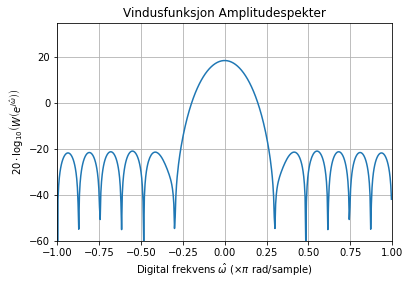

In [2]:
# Parametre
N = 16           # Lengde på signalvindu
DTFT_res = 500   # Oppløsning på "DTFT"-kurven

# Utregning av frekvensinnhold "W_f" og frekvens-akse "f"
w_n = win.hamming(N)
W_f = np.fft.fft(w_n, n=DTFT_res)
#W_f = W_f
W_f = np.fft.fftshift(W_f) # Sentrerer DFT rundt 0.
f = np.linspace(-1, 1, DTFT_res, endpoint=False)

# Plotting av figur
plt.close(1)
plt.figure(1)
plt.plot(f, 20*np.log10(abs(W_f)))
plt.xlabel(r'Digital frekvens $\hat{\omega}\ (\times \pi\ $rad/sample$)$')
plt.ylabel(r'$20\cdot\log_{10}\left(W\left(e^{j\hat{\omega}}\right)\right)$')
plt.title(r'Vindusfunksjon Amplitudespekter')
plt.xlim([-1, 1])
plt.ylim(ymin = round(np.log10(np.real(W_f[int(DTFT_res/2)]))-4)*20)
plt.grid(True)

## Oppgave:
Filen `Oppgave2.mat` inneholder et signal merket `'x[n]'`. Kodecellen nedenfor laster inn de aktuelle dataene dataene fra `.mat`-filen, lagrer de i variabelen `x_n` og lager et stolpediagram av signalet.

Text(0.5, 1.0, '$x[n]$')

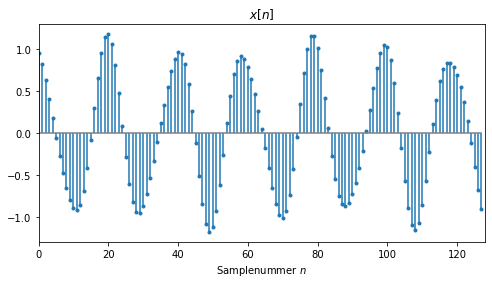

In [3]:
data = loadmat('Datafiler/Oppgave3.mat', squeeze_me=True)
xn = data['x[n]']
N = len(xn)
n = np.arange(N)
plt.close(2);plt.figure(2, figsize=(8,4))
plt.stem(n, xn, markerfmt='.', basefmt='grey', use_line_collection=True)
plt.xlim([0, N])
plt.xlabel(r'Samplenummer $n$')
plt.title(r'$x[n]$')

### a) 

Utfør beregninger i kodecellen nedenfor slik at en ny figur viser en representasjon av signalets amplitudespekter $|X[k]|$. Hor mange sinus-komponenter ser det ut som signalet består av hvis du dømmer etter signalets DFT? Stemmer dette bra med det vi ser i tidsplotet?

Text(0.5, 1.0, '$|X[k]|$')

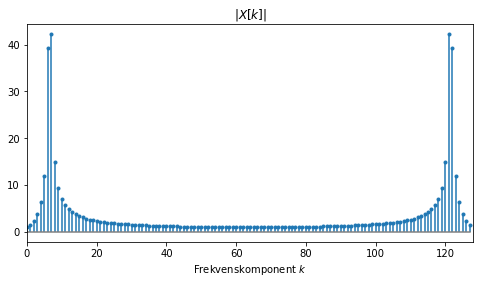

In [4]:
### BEGIN SOLUTION
Xk = fft(xn)
plt.close(3);plt.figure(3, figsize=(8,4))
plt.stem(n, np.abs(Xk), markerfmt='.', basefmt='grey', use_line_collection=True)
plt.xlim([0, N])
plt.xlabel(r'Frekvenskomponent $k$')
plt.title(r'$|X[k]|$')
### END SOLUTION

Ved å se på amplitudespekteret $X[k]$, er det ikke noen indikasjon på at signalet består av mer enn 1 sinuskomponent.

## b) 
Velg en vindusfunksjon fra `scipy.signal.window`, og generer et vindu med samme lengde som signalet fra datafilen. Bruk så dette vinduet til å vekte signalet, regn ut en ny DFT av det vektede signalet, og vis et stolpediagram av DFT-sekvensen i en ny figur. Hvor mange separate sinuskomponenter klarer du å identifisere ut ifra signalets DFT når en vindusfunksjon er tatt i bruk?

Text(0.5, 1.0, '$|X[k]|$')

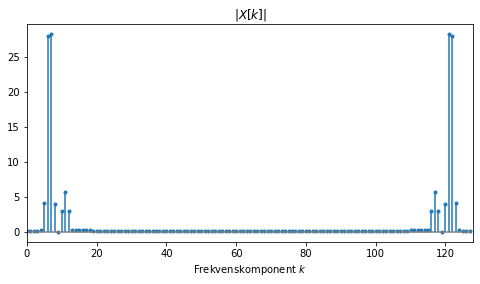

In [5]:
### BEGIN SOLUTION
w_n = win.hamming(N)
Xk = fft(xn*w_n)
plt.close(3);plt.figure(3, figsize=(8,4))
plt.stem(n, np.abs(Xk), markerfmt='.', basefmt='grey', use_line_collection=True)
plt.xlim([0, N])
plt.xlabel(r'Frekvenskomponent $k$')
plt.title(r'$|X[k]|$')
### END SOLUTION

Når vi bruker et Hammingvindu til å vekte signalet før utregning av FFT, er det vil amplitudespekteret tydelig vise to adskilte toppunkt, som representerer hver sin sinuskomponent.